# 2. OLS Linear Regression

We begin with the familiar topic of ordinary least squares (OLS) linear regression. The table below shows an excerpt of Chicago Public School data for 2011--2012 from the Chicago Data Portal. One expects  a higher average ACT score to be associated with a higher percentage of college eligibility.  
<table>
  <tr>
    <th> School zipcode  </th>
    <th>Average ACT Score</th>
    <th> College Eligibility</th></tr>
  <tr>
    <td>60605   </td>
    <td>25.1</td>
    <td>80.7</td></tr>
  <tr>
    <td> 60607  </td>
    <td>27</td>
    <td>91.6</td></tr>
  <tr>
    <td> ...  </td>
    <td>...</td>
    <td>...</td></tr>
  <tr>
    <td> 60660  </td>
    <td>16.5  </td>
    <td>14.2</td>
  </tr>
</table>



Source: Chicago Data Portal, 

https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t


The figure below shows a scatterplot  of $n= 83 $ data points partly reproduced in the above table together with the OLS regression line.

<img src="fig1.png" width="200px"> 

### Least-Squares Solutions

Consider a  collection of $n$ data points $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$ in $\mathbb{R}^2.$ We seek the line $y=c_0+c_1x$ that best fits these data, where $c_0$ is the $y$-intercept of the line and $c_1$ the slope of the line. As shown in the figure below, an OLS loss function $J(c_0,c_1)$ sums the squared vertical separations between the data points $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$  and the line $y=c_0+c_1x$.


<img src="fig2.png" width="300px"> 




If the $n$ data points are collinear, then there exists an exact solution  $(c_0,c_1)$ to the system
	
$$
c_0 + c_1 x_1 = y_1,
$$

$$
c_0+c_1x_2  = y_2,
$$

$$\vdots$$

$$
c_0+c_1 x_n  = y_n. 
$$

In matrix form, this system of equations  becomes 

$$
\mathbf{A}\mathbf{c}=\mathbf{y}, 
$$

where

$$
 \mathbf{A}=
\begin{pmatrix}
1& x_1\\
1& x_2\\
\vdots&\vdots\\
1& x_n
\end{pmatrix},\quad \mathbf{c}=
\begin{pmatrix}
c_0\\
c_1
\end{pmatrix}, \quad \, and \, \quad \mathbf{y}=
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}.
$$


 In general, this linear system with $n>2$ equations and 2 unknowns  ($c_0,c_1$)  will not have an exact solution.  Instead, our goal to find a linear fit to the data is based on a <i>least-squares solution</i>, one that solves the following optimization problem:


### OLS LINEAR REGRESSION OPTIMIZATION PROBLEM 

`````{admonition} OLS Linear Regression Optimization Problem
:class: tip

Find $(c_0,c_1)$ which minimizes the loss function $J(c_0,c_1)$ defined as

$$
J(c_0,c_1)=\tfrac{1}{2}\sum_{i=1}^n (y_i-(c_0+c_1x_i) )^2=\tfrac{1}{2}\|\mathbf{y} - \mathbf{A}\mathbf{c}\|^2.
$$

(The factor of 1/2 multiplying the sum is introduced to simplify theoretical analysis of the loss function.)

`````

The loss function $J$ is  zero when the points are collinear and situated on the line $y=c_0+c_1x$; otherwise,  $J$  is positive, since it is  half the sum of the squared vertical separations between data points and the line $y=c_0+c_1x$, as shown in the previous figure.


### Minimizing the OLS Loss Function  via Normal Equations

Let $\mathbf{A}$ be an $n\times 2$ matrix of real numbers, and let the linear transformation $\mathbf{L}:\mathbb{R}^2\rightarrow\mathbb{R}^n$ be defined by $\mathbf{L}(\mathbf{c})= \mathbf{A}\mathbf{c}$, where $\mathbf{c}$ is a $2\times 1$ column vector. The range of  $\mathbf{A}$ is the set of all $n\times 1$ vectors defined  by

$$
range\, of \, \mathbf{A} = \{ \mathbf{A}\mathbf{c} \mid \mathbf{c}\in\mathbf{R}^2\}. 
$$

By choosing $\mathbf{c}=(1,0)^T$, we see that  the first column of $\mathbf{A}$ (denoted $\mathbf{a}_1$) is in the range of $\mathbf{A}$. By choosing $\mathbf{c}=(0,1)^T$, we see that  the second column of $\mathbf{A}$ (denoted $\mathbf{a}_2$) is also in the range of $\mathbf{A}$. 


Minimizing the loss function $J(\mathbf{c}) =\frac{1}{2}\|\mathbf{y} - \mathbf{A}\mathbf{c}\|^2$ is equivalent to minimizing  $\|\mathbf{y} - \mathbf{A}\mathbf{c}\|$, the latter being   the distance between $\mathbf{y}$ and an arbitrary vector $\mathbf{A} \mathbf{c}$ that is in the range of $\mathbf{A}$ (see figure below). If there is no exact solution (i.e., $\mathbf{y}$ is not in the range of $\mathbf{A})$, this minimization is accomplished by choosing $\mathbf{\hat{c}}$ such that vector $\mathbf{y}-\mathbf{A}\hat{c}$ is orthogonal to the range of $\mathbf{A}$.  That is, for $\mathbf{\hat{c}}$ to be a least-squares solution to $ \mathbf{A}\mathbf{c}=\mathbf{y}$, the vector  $\mathbf{y}-\mathbf{A}\mathbf{\hat{c}}$ must be orthogonal (perpendicular) to each vector  in the range of $\mathbf{A}$. Since both column vectors of $\mathbf{A}$ (namely,  $\mathbf{a}_1$ and $\mathbf{a}_2$) are in the range of $\mathbf{A}$, it follows that $\mathbf{a}_i\cdot(\mathbf{y}-\mathbf{A}\mathbf{\hat{c}})=\mathbf{a}_i^T(\mathbf{y}-\mathbf{A}\mathbf{\hat{c}})=0$ for each column vector $\mathbf{a}_i$ of matrix~$\mathbf{A}.$

<img src="fig3.png" width="400px"> 


 Hence,
 
$$
\mathbf{A}^T(\mathbf{y}-\mathbf{A}\mathbf{\hat{c}})=\mathbf{0}\Rightarrow \label{N1}
$$

$$
\mathbf{A}^T\mathbf{y}-\mathbf{A}^T\mathbf{A}\mathbf{\hat{c}} = \mathbf{0}\Rightarrow 
$$

$$
\mathbf{A}^T\mathbf{y}=\mathbf{A}^T\mathbf{A}\mathbf{\hat{c}}
$$

The last equation is called the \emph{normal equations} for the system $\mathbf{A}\mathbf{c}=\mathbf{y}.$ Solving the normal equations, one obtains optimal values for $c_0,c_1$. 


#### Example 2.1.

```{admonition} Example 2.1

Consider the data $(-1, 1)$, $(0, 0)$, $(1, 2)$, $(2, 3)$. Use the normal equations to find the OLS regression line for the data.

```

```{toggle}
<b> Solution.</b>

The system is

\begin{align*}
c_0-c_1&=1,\\
c_0&=0,\\
c_0+c_1&=2,\\
c_0+2c_1&=3;\\
\end{align*}


or, in matrix form,

\begin{align*}
\begin{pmatrix}
1& -1\\
1& 0\\
1&1\\
1& 2
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1
\end{pmatrix}=
\begin{pmatrix}
1\\
0\\
2\\
3
\end{pmatrix}.
\end{align*}
The normal equations are 
\begin{eqnarray}
\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2
\end{pmatrix}
\begin{pmatrix}
1\\
0\\
2\\
3
\end{pmatrix}=
\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2
\end{pmatrix}
\begin{pmatrix}
1& -1\\
1& 0\\
1&1\\
1& 2
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1
\end{pmatrix},
\label{ne}
\end{eqnarray}
or
\begin{eqnarray*}
\begin{pmatrix}
6\\
7
\end{pmatrix}=
\begin{pmatrix}
4&2\\
2&6
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1
\end{pmatrix}.
\end{eqnarray*}
The least-squares solution is therefore  $c_0=11/10$, $c_1=4/5.$ 

```

### Equivalence of Gradient-Based Optimization


Note that the normal equations are equivalent to gradient-based minimization of the OLS linear regression loss function $J(c_0,c_1)=\frac{1}{2}\sum_{i=1}^n (y_i-(c_0+c_1x_i) )^2$:

\begin{align*}
\mathbf{A}^T(\mathbf{y}-\mathbf{A}\mathbf{\hat{c}})&=
\begin{pmatrix}
1 & 1& \dots& 1\\
x_1&x_2&\dots&x_n
\end{pmatrix}
\begin{pmatrix}
y_1-(c_0+c_1x_1)\\
y_2-(c_0+c_1x_2)\\
\dots\\
y_n-(c_0+c_1x_n)
\end{pmatrix}\\
&=
\begin{pmatrix}
\sum_{i=1}^n \bigl(y_i-(c_0+c_1x_i)\bigr)\\\\
\sum_{i=1}^n x_i\bigl(y_i-(c_0+c_1x_i)\bigr)
\end{pmatrix}=
\begin{pmatrix}
-\tfrac{\partial J}{\partial c_0}\\
-\tfrac{\partial J}{\partial c_1}
\end{pmatrix}=
\begin{pmatrix}
0\\
0
\end{pmatrix}.
\end{align*}
The normal equations are equivalent to setting both partial derivatives of $J$ equal to zero, as is required to minimize the loss function $J(c_0,c_1)$.




#### Example 2.2.

```{admonition} Example 2.2

For the data points in Example 2.1, show how gradient-based optimization of the loss function $J$ gives the same values for $c_0$ and $c_1$.

```

```{toggle}

<b> Solution:</b>

The loss function $J(c_0,c_1)$ is 

\begin{align*}
J(c_0,c_1)&=\tfrac{1}{2}[\bigl(1-(c_0-c_1)\bigr)^2+(0-c_0)^2+\bigl(2-(c_0+c_1)\bigr)^2+\\
&\qquad\bigl(3-(c_0+2c_1)\bigr)^2].
\end{align*}

To minimize $J$, we solve the linear system for $\nabla J(c_1,c_2)=\mathbf{0}$: 

$$
\frac{\partial J}{\partial c_0}
=4c_0+2c_1-6=0, \qquad
\frac{\partial J}{\partial c_1} =2c_0+6c_1-7=0.
$$

Solving this system, we obtain $c_0=11/10$ and $c_1=4/5$. 



{\flushleft The} system used to find these critical values is equivalent to:

\begin{align}
%\scriptstyle
\begin{pmatrix}
%\scriptstyle
-\frac{\partial J}{\partial c_0}\\
-\frac{\partial J}{\partial c_1}
\end{pmatrix}&=
\begin{pmatrix}
\scriptstyle
\bigl(1-(c_0-c_1)\bigr)+(0-c_0)+\bigl(2-(c_0+c_1)\bigr)+\bigl(3-(c_0+2c_1\bigr) \\
\scriptstyle-\bigl(1-(c_0-c_1)\bigr)+0(0-c_0)+\bigl(2-(c_0+c_1)\bigr)+2\bigl(3-(c_0+2c_1)\bigr)
\end{pmatrix}\nonumber\\
&=
\scriptstyle\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2
\end{pmatrix}
\scriptstyle
\begin{pmatrix}
1\\
\textstyle 0\\
2\\
3
\end{pmatrix}-
\scriptstyle\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2
\end{pmatrix}
\scriptstyle\begin{pmatrix}
1& -1\\
1& 0\\
1&1\\
1& 2
\end{pmatrix}
\scriptstyle\begin{pmatrix}
c_0\\
c_1
\end{pmatrix}=
\scriptstyle
\begin{pmatrix}
0\\
0
\end{pmatrix},
\label{ne1}
\end{align}


Gradient-based optimization expressed  is indeed equivalent to the normal equations.

```

To say that solving the normal equations is mathematically equivalent to gradient-based optimization of the OLS loss function does not  imply that the normal equations offer the best numerical method for optimization of the loss function [Epperly 2022]. Beyond the scope of this Module is an assessment of different numerical approaches such as gradient descent and its variants including the  Adam method [Sun et. al. 2019], matrix factorizations such as $SVD$ or $QR$ [Aggarwal 2020], and mean-centering and standardizing data [Toth 2020]. 

In addition to facilitating numerical analysis, mean-centering simplifies the linear algebra approach. Mean-centered data is obtained from a collection of data points by  replacing the original dataset  $(x_i,y_i)$  with  the data points $(x_i-\bar{x},y_i-\bar{y})$, $i=1, \dots n$, where $\bar{x}$ and $\bar{y}$ are the respective  means of the $x$ and $y$ coordinates of the original data.  One can show that for mean-centered data,  $\hat{c}_0=0$, and the regression line is  $y = \hat{c}_1 x$.  Let $\mathbf{x}=(x_1,x_2,...,x_n)^{tr}$.  For mean-centered data, the regression vector ${\bf \hat{y}}=\hat{c}_1\mathbf{x}$ is obtained by projecting the vector ${\bf y}$ directly onto  the vector ${\bf x}$ as shown in the figure below.

<img src="fig4.png" width="200px"> 





The <i>variation equation</i> states that the total variation in the y-values is the sum of the explained variation (variation in the corresponding $y$-values on the regression line)  and the unexplained variation (the sum of squared residuals or twice the value of the loss function $J$). For mean-centered data, the total variation is $\mid\mid \mathbf{y}\mid\mid^2$, the explained variation is $\mid\mid \hat{c}_1\mathbf{x}\mid\mid^2$ and the unexplained variation is $\mid\mid \mathbf{y} -\hat{c}_1 \mathbf{x}\mid\mid^2$. In other words, the variation equation for mean-centered data is simply the Pythagorean theorem.

### Practice Problems

```{admonition} Practice Problems

1) Consider the data $(1, 0)$, $(4, 5)$, $(7, 8)$.  Use the normal equations  to find the least-squares solution line $y  = a + bx$ that best fits the data. 


2) Consider the data $(-1,1)$, $(0,0)$, $(1,2)$, $(2,3)$.  Use the normal equations to find the least-squares solution for the parabola $y=a+bx+cx^2$ that best fits the data.

```

#### Solutions to Practice Problems

```{toggle}

Problem 1) 
The system is

\begin{align*}
a+b&=0,\\
a + 4b&=5,\\
a+7b&=8;
\end{align*}

or, in matrix form,

\begin{align*}
\begin{pmatrix}
1& 1\\
1& 4\\
1&7\\
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
\end{pmatrix}=
\begin{pmatrix}
0\\
5\\
8\\
\end{pmatrix}.
\end{align*}

The normal equations are

\begin{align*}
\begin{pmatrix}
1& 1&1\\
1&4&7\\
\end{pmatrix}
\begin{pmatrix}
0\\
5\\
8\\
\end{pmatrix}=
\begin{pmatrix}
1& 1&1\\
1&4&7\\
\end{pmatrix}
\begin{pmatrix}
1& 1\\
1& 4\\
1&7\\
\end{pmatrix}
\begin{pmatrix}
a\\
b
\end{pmatrix},
\end{align*}

or
	
\begin{align*}
\begin{pmatrix}
13\\
76
\end{pmatrix}=
\begin{pmatrix}
3&12\\
12&66
\end{pmatrix}
\begin{pmatrix}
a\\
b
\end{pmatrix}.
\end{align*}

Solving the normal equations gives the least-squares solution $a=-1$,  $b=4/3$. 

```


```{toggle}


Problem 2)

The system is
	
\begin{align*}
a-b+c&=1,\\
a&=0,\\
a+b+c&=2,\\
a+2b+4c&=3;\\
\end{align*}
	
or, in matrix form,
	
\begin{align*}
\begin{pmatrix}
1& -1&1\\
1& 0&0\\
1&1&1\\
1& 2&4
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
c
\end{pmatrix}=
\begin{pmatrix}
1\\
0\\
2\\
3
\end{pmatrix}.
\end{align*}

The normal equations are

\begin{align*}
\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2\\
1&0&1&4
\end{pmatrix}
\begin{pmatrix}
1\\
0\\
2\\
3
\end{pmatrix}=
\begin{pmatrix}
1& 1&1&1\\
-1&0&1&2\\
1&0&1&4
\end{pmatrix}
\begin{pmatrix}
1& -1&1\\
1& 0&0\\
1&1&1\\
1& 2&4
\end{pmatrix}
\begin{pmatrix}
a\\
b
\end{pmatrix},
\end{align*}
or
\begin{align*}
\begin{pmatrix}
6\\
7\\
15
\end{pmatrix}=
\begin{pmatrix}
4&2&6\\
2&6&8\\
6&8&18
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
c
\end{pmatrix}.
\end{align*}

Solving the normal equations gives the least-squares solution $a=3/5, b=3/10$, and $c=1/2.$


```

## Lab

In this lab we will make scatterplots of data which include the OLS regression line.

We begin by importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Example 1

```{admonition} OLS Regression of ACT and College Eligibility
Datafile: ACTCollegeEligible.csv
```

1) Import Libraries, dropping rows with missing data.

In [2]:
df=pd.read_csv("ACTCollegeEligible.csv")
df=df.dropna()
df.head(2)

,School Name,Street Address,ZIP,Average Score ACT 2012,5-Year Cohort Graduation Rate 2012 - Percent,One-Year Dropout Rate 2012 - Percent,Freshman On-Track to Graduate 2012 - Percent,College Eligibility 2012 - Percent,College Enrollment 2012 - Percent,College Retention 2010 - Percent,Misconducts Resulting in Suspensions 2012 - Percent,Average Days of Suspension 2012,Student Attendance 2012 - Percent,Teacher Attendance 2012 - Percent,X Coordinate,Y Coordinate,Longitude,Latitude,Location
0,Chicago Academy High School,3400 N Austin Ave,60634,19.3,71.0,4.0,82.2,35.2,75.8,71.0,4.5,2.6,93.6,95.6,1135740.091,1922002.941,-87.776506,41.942154,"(-87.77650575, 41.94215439)"
3,William Jones College Preparatory High School,606 S State St,60605,25.1,87.1,1.5,98.0,80.7,92.2,90.8,10.6,4.5,93.9,95.3,1176412.354,1897618.088,-87.627755,41.874419,"(-87.62775497, 41.87441898)"


2) Specify the x and y coordinates of the points to be plotted.

In [3]:
X=df[["Average Score ACT 2012"]]
Y=df[["College Eligibility 2012 - Percent"]]

3)  Create the OLS regression model.

In [4]:
OLSmodel = LinearRegression()
OLSmodel.fit(X, Y)
print("OLS regression line y=mx+b")
print("slope m=",OLSmodel.coef_)
print("intercept b=",OLSmodel.intercept_)

OLS regression line y=mx+b
slope m= [[6.09611136]]
intercept b= [-80.78259412]


4) Make the scatterplot with regression line.

Intercept is  [-80.78259412]
Slope is  [[6.09611136]]
R^2 for OLS is  0.9351396968249491


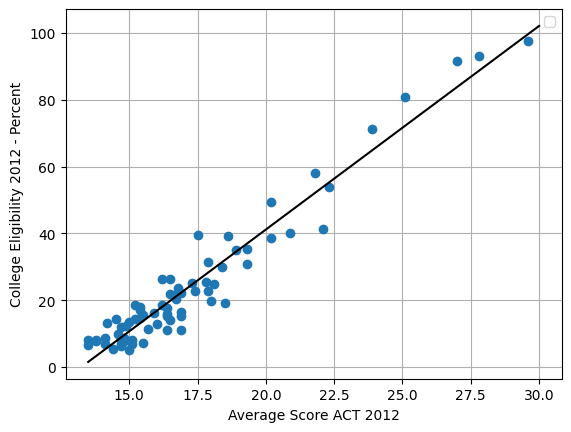

In [5]:
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df[["Average Score ACT 2012"]]
Y=df[["College Eligibility 2012 - Percent"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 13.5 and 30 
x = np.linspace(13.5, 30 ,100) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
#plot the data points 
fig=df.plot(x="Average Score ACT 2012", y="College Eligibility 2012 - Percent", style='o')  
plt.xlabel("Average Score ACT 2012")  
plt.ylabel("College Eligibility 2012 - Percent")  
# plot the regression line 
plt.plot(x,y, 'k') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.show()

### Example 2

```{admonition} Linear Regression of Chicago Public School Data 
Data File:  Imported directly from the Chicago data portal in Step 1.
```

1) Let's begin by executing the following cell to retrieve a Chicago Public School (CPS) dataset.

In [6]:
import pandas as pd
import numpy as np
raw_CPS_data=  pd.read_json('https://data.cityofchicago.org/resource/kh4r-387c.json?$limit=100000')
raw_CPS_data.head() 

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,fifth_contact_title,fifth_contact_name,seventh_contact_title,seventh_contact_name,refugee_services,visual_impairments,freshman_start_end_time,sixth_contact_title,sixth_contact_name,hard_of_hearing
0,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400069,4150,67081,POLARIS,Polaris Charter Academy,ES,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,610191,6070,29291,STONE,Stone Elementary Scholastic Academy,ES,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400173,9648,66801,PATHWAYS - BRIGHTON PARK HS,Pathways in Education- Brighton Park,HS,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610153,5670,25191,RYDER,William H Ryder Math & Science Specialty ES,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Let's get the column names

In [7]:
raw_CPS_data.columns

Index(['school_id', 'legacy_unit_id', 'finance_id', 'short_name', 'long_name',
       'primary_category', 'is_high_school', 'is_middle_school',
       'is_elementary_school', 'is_pre_school', 'summary',
       'administrator_title', 'administrator', 'secondary_contact_title',
       'secondary_contact', 'address', 'city', 'state', 'zip', 'phone', 'fax',
       'cps_school_profile', 'website', 'facebook', 'attendance_boundaries',
       'grades_offered_all', 'grades_offered', 'student_count_total',
       'student_count_low_income', 'student_count_special_ed',
       'student_count_english_learners', 'student_count_black',
       'student_count_hispanic', 'student_count_white', 'student_count_asian',
       'student_count_native_american', 'student_count_other_ethnicity',
       'student_count_asian_pacific', 'student_count_multi',
       'student_count_hawaiian_pacific', 'student_count_ethnicity_not',
       'statistics_description', 'demographic_description', 'dress_code',
       'pre

3) Let's find the number of rows in each column which have data using a command of the form df.count().

In [8]:
raw_CPS_data.count()

school_id                  654
legacy_unit_id             654
finance_id                 654
short_name                 654
long_name                  654
                          ... 
visual_impairments           6
freshman_start_end_time    101
sixth_contact_title         45
sixth_contact_name          45
hard_of_hearing             13
Length: 92, dtype: int64

4) Let's check what entries there are in the 'grades_offered' column.

In [9]:
raw_CPS_data['grades_offered'].value_counts()

grades_offered
PK,K-8       327
9-12         144
K-8           82
7-12          11
PK,K-6        10
PK,K-5        10
6-12           9
K-6            8
6-8            6
PK,K-4         4
K-12           4
PE,PK,K-8      4
11-12          4
5-8            3
PK             3
K-5            3
PK,K-3         3
8-12           2
PK,K-2         2
7-8            2
PK,3-8         1
9              1
K,4-8          1
K-1,5-8        1
3-12           1
K-3,5-8        1
1-8            1
PK,K-7         1
10-12          1
4-11           1
K-3            1
K-2            1
4-8            1
Name: count, dtype: int64

5) Let's create a dataframe called mid with just the data for PK,K-8 

In [10]:
mid=raw_CPS_data[raw_CPS_data['grades_offered']=='PK,K-8']
mid.head(2)

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,fifth_contact_title,fifth_contact_name,seventh_contact_title,seventh_contact_name,refugee_services,visual_impairments,freshman_start_end_time,sixth_contact_title,sixth_contact_name,hard_of_hearing
0,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610153,5670,25191,RYDER,William H Ryder Math & Science Specialty ES,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6) Let's streamline the data to a dataframe df which includes just the columns ['address','student_count_total','student_count_black','student_count_hispanic','student_count_white','zip']

In [11]:
df=raw_CPS_data[['address','student_count_total','student_count_black','student_count_hispanic','student_count_white','zip']]
df.head(2)

,address,student_count_total,student_count_black,student_count_hispanic,student_count_white,zip
0,2819 W 21ST PL,342,33,304,2,60623
1,620 N SAWYER AVE,378,337,33,5,60624


7) Let's get all the schools with zip 60623

In [12]:
df23=df[df['zip']==60623]
df23.head(2)

,address,student_count_total,student_count_black,student_count_hispanic,student_count_white,zip
0,2819 W 21ST PL,342,33,304,2,60623
11,2345 S CHRISTIANA AVE,559,66,484,9,60623


7) Let's reset the index.

In [13]:
df23=df23.reset_index(drop=True)
df23.head(5)

,address,student_count_total,student_count_black,student_count_hispanic,student_count_white,zip
0,2819 W 21ST PL,342,33,304,2,60623
1,2345 S CHRISTIANA AVE,559,66,484,9,60623
2,3500 W DOUGLAS BLVD,216,212,4,0,60623
3,3711 W DOUGLAS BLVD,499,480,14,3,60623
4,4217 W 18TH ST,316,306,10,0,60623


8) What is the size of the biggest CPS PK,K-8 in 60623?

In [14]:
max=df23["student_count_total"].max()
max

1072

9) What is the size of the smallest CPS PK,K-8 in 60623?

In [15]:
min=df23["student_count_total"].min()
min

96

10) Let's simplify the column names to ["address","total","black","hispanic","white"]

In [16]:
df23.columns= ["address","total","black","hispanic","white","zip"]
df23.head(1)


,address,total,black,hispanic,white,zip
0,2819 W 21ST PL,342,33,304,2,60623


10) Let's create 3 new columns '%black', '%hispanic', '%white'

In [17]:
for i in df23.index:
    df23.loc[i,'%black']=round(100*df23.loc[i,'black']/df23.loc[i,'total'],1)
    df23.loc[i,'%hispanic']=round(100*df23.loc[i,'hispanic']/df23.loc[i,'total'],1)
    df23.loc[i,'%white']=round(df23.loc[i,'white']/df23.loc[i,'total'],1)
df23.head(5)

,address,total,black,hispanic,white,zip,%black,%hispanic,%white
0,2819 W 21ST PL,342,33,304,2,60623,9.6,88.9,0.0
1,2345 S CHRISTIANA AVE,559,66,484,9,60623,11.8,86.6,0.0
2,3500 W DOUGLAS BLVD,216,212,4,0,60623,98.1,1.9,0.0
3,3711 W DOUGLAS BLVD,499,480,14,3,60623,96.2,2.8,0.0
4,4217 W 18TH ST,316,306,10,0,60623,96.8,3.2,0.0


### Exercise


```{admonition} Exercise
Make a scatterplot which shows the %black (x-axis) vs. %hispanic (y-axis) and include the OLS regression line on the plot. What does the graph tell us about grade pre K - 8 schools in Chicago zip code 60623?
```

### Solution

Intercept is  [98.71284906]
Slope is  [[-0.99515441]]
R^2 for OLS is  0.9996943205528053


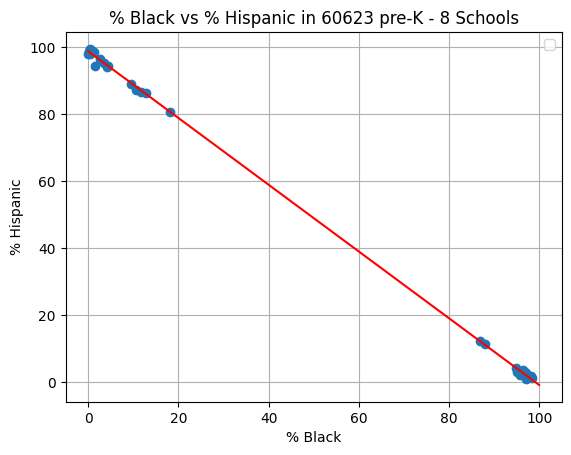

In [18]:
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df23[["%black"]]
Y=df23[["%hispanic"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .0
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   

fig=df23.plot(x='%black', y='%hispanic', style='o')  
plt.title('% Black vs % Hispanic in 60623 pre-K - 8 Schools')  
plt.xlabel('% Black')  
plt.ylabel('% Hispanic')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.show()

The graph show that schools are predominantly hispanic or preominantly black.